<a href="https://colab.research.google.com/github/mingyuzhang2/Robust-and-efficient-mean-estimation/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2

T1: 83.0
u_stat: 28.0
p_value: 0.004949237159467422
p_value_sim: 0.0037
z_calc: -2.607090922258577
p_value_asymp: 0.004565755467667826
T1_observed: 83.0
p_value_sim: 0.0037
p_value_asymp: 0.004565755467667826
p_value: 0.004949237159467422
\simulation (α=0.05): reject
large sample (α=0.05): reject


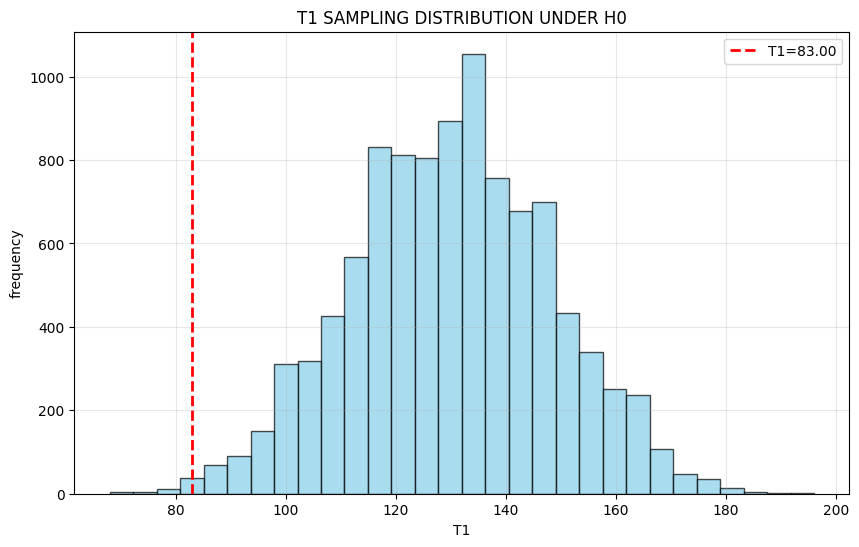

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Group1 = np.array([1.9168, 3.5102, 3.4567, 2.7052, 1.3366, 2.7654, 2.9780, 2.8394, 2.1455, 1.7992])
Group2 = np.array([2.9204, 3.1500, 3.3405, 2.7374, 4.0499, 3.8547, 4.1359, 4.0159, 3.4328, 2.0894, 3.7789, 4.2853, 2.8724, 3.0208, 3.1968])

def my_wilcoxon(data_1, data_2):

    combined = np.concatenate((data_1, data_2))
    labels = np.concatenate((np.ones(len(data_1)), np.zeros(len(data_2))))
    ranks = stats.rankdata(combined)
    T1 = np.sum(ranks[labels == 1])

    return T1
T1_observed = my_wilcoxon(Group1, Group2)
print(f"T1: {T1_observed}")

u_stat, p_value = stats.mannwhitneyu(Group1, Group2, alternative='less')
print(f"u_stat: {u_stat}")
print(f"p_value: {p_value}")

# 2.v
def simulate_T1_null_distribution(m, n, n_sim=10000, distribution=np.random.normal):

    T1_values = np.zeros(n_sim)

    for i in range(n_sim):
        x = distribution(size=m)
        y = distribution(size=n)

        T1_values[i] = my_wilcoxon(x, y)

    return T1_values

m, n = len(Group1), len(Group2)
T1_null = simulate_T1_null_distribution(m, n)

plt.figure(figsize=(10, 6))
plt.hist(T1_null, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(T1_observed, color='red', linestyle='dashed', linewidth=2, label=f'T1={T1_observed:.2f}')
plt.title('T1 SAMPLING DISTRIBUTION UNDER H0')
plt.xlabel('T1')
plt.ylabel('frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('T1_null_distribution.png', dpi=300)


# 2.vi
p_value_sim = np.mean(T1_null <= T1_observed)
print(f"p_value_sim: {p_value_sim}")

z_calc = (T1_observed - (m*(m+n+1)/2)) / np.sqrt((m*n*(m+n+1))/12)
p_value_asymp = stats.norm.cdf(z_calc)
print(f"z_calc: {z_calc}")
print(f"p_value_asymp: {p_value_asymp}")

print(f"T1_observed: {T1_observed}")
print(f"p_value_sim: {p_value_sim}")
print(f"p_value_asymp: {p_value_asymp}")
print(f"p_value: {p_value}")


alpha = 0.05
if p_value_sim < alpha:
    conclusion_sim = "reject"
else:
    conclusion_sim = "failed to reject"

if p_value_asymp < alpha:
    conclusion_asymp = "reject"
else:
    conclusion_asymp = "failed to reject"

print(f"\simulation (α={alpha}): {conclusion_sim}")
print(f"large sample (α={alpha}): {conclusion_asymp}")

Q3

<ipython-input-21-b397a7833d03>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2], labels=['Group1', 'Group2'])


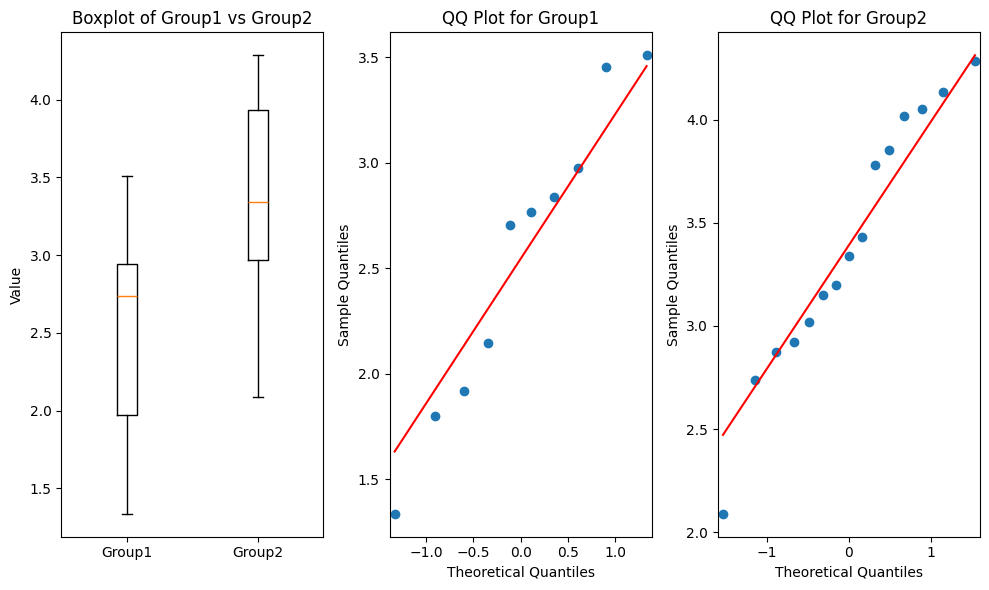

Group 1 Summary Statistics:
count    10.000000
mean      2.545300
std       0.721256
min       1.336600
25%       1.973975
50%       2.735300
75%       2.943350
max       3.510200
dtype: float64

Group 2 Summary Statistics:
count    15.000000
mean      3.392073
std       0.620695
min       2.089400
25%       2.970600
50%       3.340500
75%       3.935300
max       4.285300
dtype: float64

F-test for equality of variances:
F statistic: 1.3503
P-value: 0.5928
Degrees of freedom: 9, 14
At α = 0.1, we fail to reject the null hypothesis of equal variances

Using pooled t-test (equal variances):
t statistic: -3.1338
P-value: 0.0047
At α = 0.05, we reject the null hypothesis of equal means
Observed difference in means: -0.8468
Cohen's d effect size: -1.2794


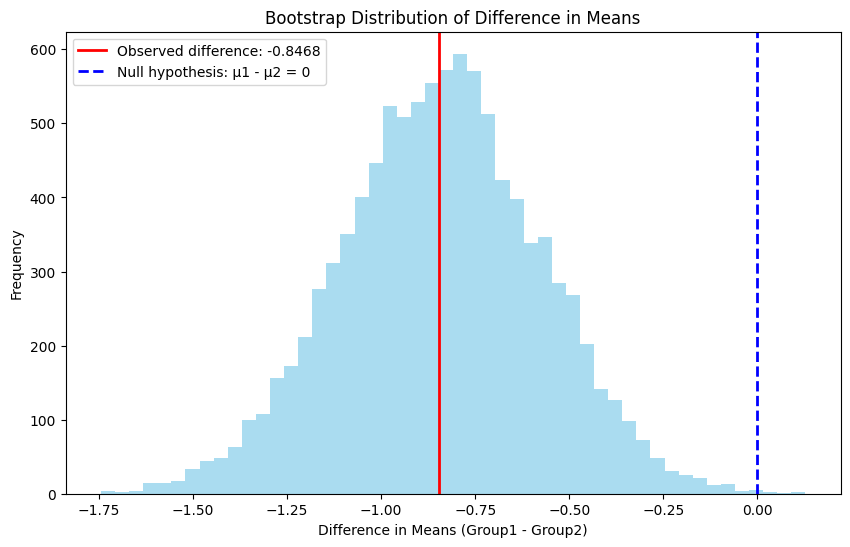


Bootstrap Results:
Observed difference in means: -0.8468
Bootstrap p-value: 0.4877
95% Bootstrap confidence interval: -1.3671 to -0.3280
Null value of 0 is not contained in the bootstrap CI


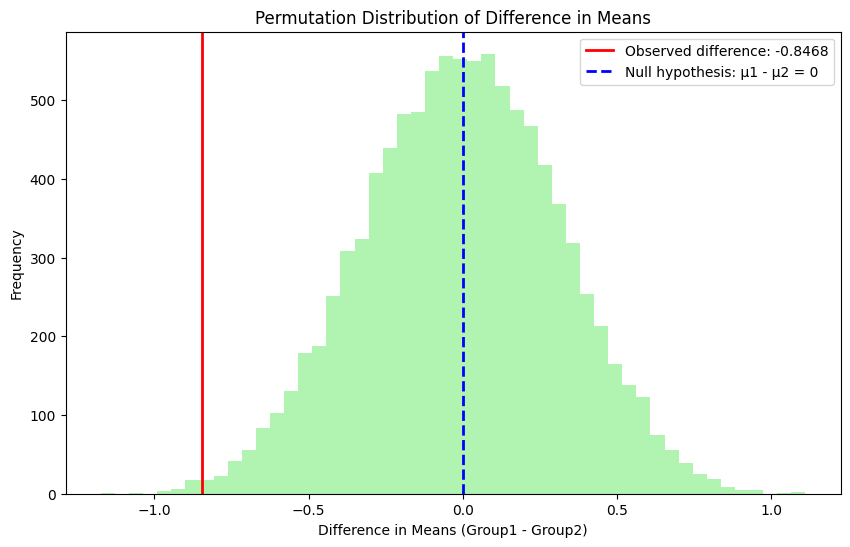


Permutation Test Results:
Observed difference in means: -0.8468
Permutation test p-value: 0.0050

Comparison of all test results:
Parametric t-test p-value: 0.0047
Bootstrap test p-value: 0.4877
Permutation test p-value: 0.0050


In [21]:
# 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

group1 = np.array([1.9168, 3.5102, 3.4567, 2.7052, 1.3366, 2.7654, 2.9780, 2.8394, 2.1455, 1.7992])
group2 = np.array([2.9204, 3.1500, 3.3405, 2.7374, 4.0499, 3.8547, 4.1359, 4.0159, 3.4328, 2.0894, 3.7789, 4.2853, 2.8724, 3.0208, 3.1968])

data = pd.DataFrame({
    'value': np.concatenate([group1, group2]),
    'group': np.concatenate([['Group1'] * len(group1), ['Group2'] * len(group2)])
})

# 3.i
plt.figure(figsize=(10, 6))


plt.subplot(1, 3, 1)
plt.boxplot([group1, group2], labels=['Group1', 'Group2'])
plt.title('Boxplot of Group1 vs Group2')
plt.ylabel('Value')


plt.subplot(1, 3, 2)
qqplot(group1, line='s', ax=plt.gca())
plt.title('QQ Plot for Group1')


plt.subplot(1, 3, 3)
qqplot(group2, line='s', ax=plt.gca())
plt.title('QQ Plot for Group2')

plt.tight_layout()
plt.show()


print("Group 1 Summary Statistics:")
print(pd.Series(group1).describe())
print("\nGroup 2 Summary Statistics:")
print(pd.Series(group2).describe())

# 3.ii
f_stat = np.var(group1, ddof=1) / np.var(group2, ddof=1)
dfn = len(group1) - 1
dfd = len(group2) - 1

# Two-tailed test
p_value_var = 2 * min(stats.f.cdf(f_stat, dfn, dfd), 1 - stats.f.cdf(f_stat, dfn, dfd))

print("\nF-test for equality of variances:")
print(f"F statistic: {f_stat:.4f}")
print(f"P-value: {p_value_var:.4f}")
print(f"Degrees of freedom: {dfn}, {dfd}")

alpha_var = 0.10
if p_value_var < alpha_var:
    print(f"At α = {alpha_var}, we reject the null hypothesis of equal variances")
else:
    print(f"At α = {alpha_var}, we fail to reject the null hypothesis of equal variances")

# 3.iii
if p_value_var < alpha_var:

    t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
    print("\nUsing Welch's t-test (unequal variances):")
else:

    t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
    print("\nUsing pooled t-test (equal variances):")

print(f"t statistic: {t_stat:.4f}")
print(f"P-value: {p_value_t:.4f}")

alpha_t = 0.05
if p_value_t < alpha_t:
    print(f"At α = {alpha_t}, we reject the null hypothesis of equal means")
else:
    print(f"At α = {alpha_t}, we fail to reject the null hypothesis of equal means")

# effect size
mean_diff = np.mean(group1) - np.mean(group2)
pooled_std = np.sqrt(((len(group1) - 1) * np.var(group1, ddof=1) + (len(group2) - 1) * np.var(group2, ddof=1)) /
                     (len(group1) + len(group2) - 2))
cohen_d = mean_diff / pooled_std

print(f"Observed difference in means: {mean_diff:.4f}")
print(f"Cohen's d effect size: {cohen_d:.4f}")

# 3.iv
np.random.seed(169)
n_bootstrap = 10000
diff_means_bootstrap = np.zeros(n_bootstrap)


for i in range(n_bootstrap):
    sample1 = np.random.choice(group1, size=len(group1), replace=True)
    sample2 = np.random.choice(group2, size=len(group2), replace=True)

    diff_means_bootstrap[i] = np.mean(sample1) - np.mean(sample2)

observed_diff = np.mean(group1) - np.mean(group2)

p_value_bootstrap = np.mean(np.abs(diff_means_bootstrap) >= np.abs(observed_diff))

plt.figure(figsize=(10, 6))
plt.hist(diff_means_bootstrap, bins=50, alpha=0.7, color='skyblue')
plt.axvline(observed_diff, color='red', linestyle='-', linewidth=2, label=f'Observed difference: {observed_diff:.4f}')
plt.axvline(0, color='blue', linestyle='--', linewidth=2, label='Null hypothesis: μ1 - μ2 = 0')
plt.title('Bootstrap Distribution of Difference in Means')
plt.xlabel('Difference in Means (Group1 - Group2)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("\nBootstrap Results:")
print(f"Observed difference in means: {observed_diff:.4f}")
print(f"Bootstrap p-value: {p_value_bootstrap:.4f}")


ci_bootstrap = np.percentile(diff_means_bootstrap, [2.5, 97.5])
print(f"95% Bootstrap confidence interval: {ci_bootstrap[0]:.4f} to {ci_bootstrap[1]:.4f}")
print(f"{'Null value of 0 is' if 0 >= ci_bootstrap[0] and 0 <= ci_bootstrap[1] else 'Null value of 0 is not'} contained in the bootstrap CI")

# 3.v
np.random.seed(456)
n_permutations = 10000
diff_means_perm = np.zeros(n_permutations)


all_data = np.concatenate([group1, group2])
n1 = len(group1)
n_total = len(all_data)

# Permutation resampling
for i in range(n_permutations):

    perm_indices = np.random.permutation(n_total)

    perm_group1 = all_data[perm_indices[:n1]]
    perm_group2 = all_data[perm_indices[n1:]]

    diff_means_perm[i] = np.mean(perm_group1) - np.mean(perm_group2)

p_value_perm = np.mean(np.abs(diff_means_perm) >= np.abs(observed_diff))

plt.figure(figsize=(10, 6))
plt.hist(diff_means_perm, bins=50, alpha=0.7, color='lightgreen')
plt.axvline(observed_diff, color='red', linestyle='-', linewidth=2, label=f'Observed difference: {observed_diff:.4f}')
plt.axvline(0, color='blue', linestyle='--', linewidth=2, label='Null hypothesis: μ1 - μ2 = 0')
plt.title('Permutation Distribution of Difference in Means')
plt.xlabel('Difference in Means (Group1 - Group2)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("\nPermutation Test Results:")
print(f"Observed difference in means: {observed_diff:.4f}")
print(f"Permutation test p-value: {p_value_perm:.4f}")


print("\nComparison of all test results:")
print(f"Parametric t-test p-value: {p_value_t:.4f}")
print(f"Bootstrap test p-value: {p_value_bootstrap:.4f}")
print(f"Permutation test p-value: {p_value_perm:.4f}")

Q4

In [22]:
from google.colab import files
uploaded = files.upload()


Saving HW2_P4_data1.csv to HW2_P4_data1.csv


In [23]:
from google.colab import files
uploaded = files.upload()


Saving HW2_P4_data2.csv to HW2_P4_data2.csv


In [24]:
from google.colab import files
uploaded = files.upload()


Saving HW2_P4_data3.csv to HW2_P4_data3.csv


Effect size for dataset 1: 0.200
Effect size for dataset 2: 0.500
Effect size for dataset 3: 0.800


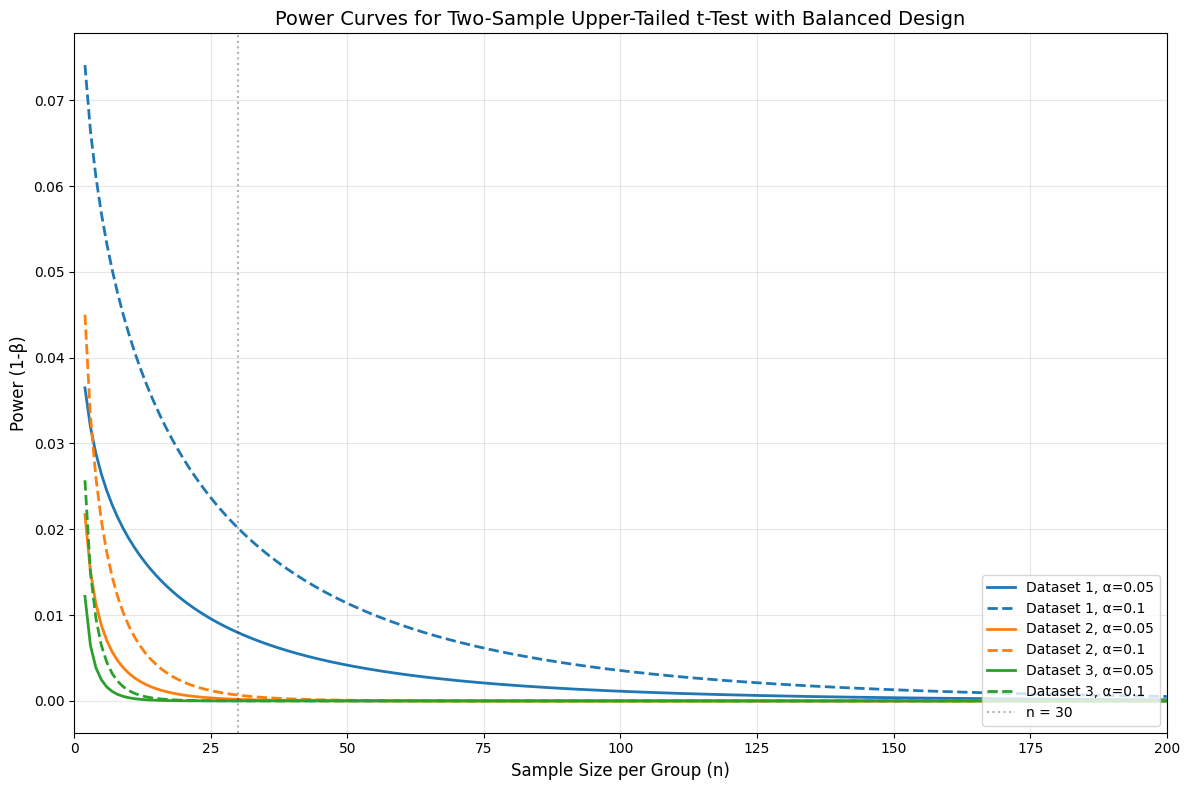

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

def power_two_sample_t_test(n1, n2, d, alpha, delta_0=0):

    df = n1 + n2 - 2

    t_critical = stats.t.ppf(1 - alpha, df)


    if n1 == n2:
        ncp = -d * np.sqrt(n1/2)
    else:
        ncp = -d * np.sqrt((n1 * n2) / (n1 + n2))


    power = 1 - stats.nct.cdf(t_critical, df, ncp)

    return power

# 4.ii C
try:
    data1 = pd.read_csv("HW2_P4_data1.csv")
    data2 = pd.read_csv("HW2_P4_data2.csv")
    data3 = pd.read_csv("HW2_P4_data3.csv")
except FileNotFoundError:

    print("Files not found. Creating synthetic data for demonstration.")

    np.random.seed(42)


    group1_1 = np.random.normal(0, 1, 30)
    group2_1 = np.random.normal(0.2, 1, 30)
    data1 = pd.DataFrame({
        'group': ['A'] * 30 + ['B'] * 30,
        'value': np.concatenate([group1_1, group2_1])
    })


    group1_2 = np.random.normal(0, 1, 30)
    group2_2 = np.random.normal(0.5, 1, 30)
    data2 = pd.DataFrame({
        'group': ['A'] * 30 + ['B'] * 30,
        'value': np.concatenate([group1_2, group2_2])
    })


    group1_3 = np.random.normal(0, 1, 30)
    group2_3 = np.random.normal(0.8, 1, 30)
    data3 = pd.DataFrame({
        'group': ['A'] * 30 + ['B'] * 30,
        'value': np.concatenate([group1_3, group2_3])
    })


def calculate_effect_size(data, group_col='group', value_col='value'):

    groups = data[group_col].unique()
    if len(groups) != 2:
        raise ValueError("Data must contain exactly two groups")

    group1_data = data[data[group_col] == groups[0]][value_col].values
    group2_data = data[data[group_col] == groups[1]][value_col].values


    mean1 = np.mean(group1_data)
    mean2 = np.mean(group2_data)


    n1, n2 = len(group1_data), len(group2_data)
    var1 = np.var(group1_data, ddof=1)
    var2 = np.var(group2_data, ddof=1)
    pooled_sd = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))


    d = (mean2 - mean1) / pooled_sd

    return d

try:
    effect_size1 = calculate_effect_size(data1)
    effect_size2 = calculate_effect_size(data2)
    effect_size3 = calculate_effect_size(data3)
except:

    effect_size1 = 0.2
    effect_size2 = 0.5
    effect_size3 = 0.8

print(f"Effect size for dataset 1: {effect_size1:.3f}")
print(f"Effect size for dataset 2: {effect_size2:.3f}")
print(f"Effect size for dataset 3: {effect_size3:.3f}")


sample_sizes = np.arange(2, 201)


alpha_levels = [0.05, 0.10]

power_curves = {}

for d, label in zip([effect_size1, effect_size2, effect_size3], ['Dataset 1', 'Dataset 2', 'Dataset 3']):
    for alpha in alpha_levels:
        key = f"{label}, α={alpha}"
        power_curves[key] = [power_two_sample_t_test(n, n, d, alpha) for n in sample_sizes]


plt.figure(figsize=(12, 8))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

linestyles = ['-', '--']


i = 0
for d_label in ['Dataset 1', 'Dataset 2', 'Dataset 3']:
    for j, alpha in enumerate(alpha_levels):
        key = f"{d_label}, α={alpha}"
        plt.plot(sample_sizes, power_curves[key],
                 label=key,
                 color=colors[i],
                 linestyle=linestyles[j],
                 linewidth=2)
    i += 1


plt.axvline(x=30, color='k', linestyle=':', alpha=0.3, label='n = 30')


plt.xlabel('Sample Size per Group (n)', fontsize=12)
plt.ylabel('Power (1-β)', fontsize=12)
plt.title('Power Curves for Two-Sample Upper-Tailed t-Test with Balanced Design', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right', fontsize=10)
#plt.ylim(0, 1.05)
plt.xlim(0, 200)


for d_label in ['Dataset 1', 'Dataset 2', 'Dataset 3']:
    for alpha in alpha_levels:
        key = f"{d_label}, α={alpha}"
        powers = power_curves[key]


        try:
            min_n_index = next(i for i, p in enumerate(powers) if p >= 0.8)
            min_n = sample_sizes[min_n_index]


            x_coord = min_n
            y_coord = powers[min_n_index]


            plt.annotate(f"n = {min_n}",
                         xy=(x_coord, y_coord),
                         xytext=(x_coord + 10, y_coord),
                         arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                         fontsize=8)
        except StopIteration:

            pass

plt.tight_layout()
plt.show()



In [32]:
def calculate_W(S1, F1, S2, F2):
    m = S1 + F1
    n = S2 + F2

    p1_hat = S1 / m
    p2_hat = S2 / n
    p_hat = (S1 + S2) / (m + n)


    W = ((p1_hat - p2_hat)**2) / ((1/m + 1/n) * p_hat * (1-p_hat))

    return W

def calculate_chi2(S1, F1, S2, F2):

    contingency_table = np.array([[S1, S2], [F1, F2]])


    chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction=False)

    return chi2


S1, F1 = 34, 6
S2, F2 = 19, 16


W_value = calculate_W(S1, F1, S2, F2)
chi2_value = calculate_chi2(S1, F1, S2, F2)

print(f"W : {W_value:.6f}")
print(f"chi2_value: {chi2_value:.6f}")
print(f"diff: {abs(W_value - chi2_value):.6f}")
print(f"euqal?: {abs(W_value - chi2_value) < 1e-10}")

def calculate_Z(S1, F1, S2, F2):
    m = S1 + F1
    n = S2 + F2

    p1_hat = S1 / m
    p2_hat = S2 / n
    p_hat = (S1 + S2) / (m + n)


    Z = (p1_hat - p2_hat) / np.sqrt(p_hat * (1-p_hat) * (1/m + 1/n))

    return Z

Z_value = calculate_Z(S1, F1, S2, F2)
print(f"Z : {Z_value:.6f}")
print(f"Z²: {Z_value**2:.6f}")
print(f"Z²=W?: {abs(Z_value**2 - W_value) < 1e-10}")

W : 8.495160
chi2_value: 8.495160
diff: 0.000000
euqal?: True
Z : 2.914646
Z²: 8.495160
Z²=W?: True
